<a href="https://colab.research.google.com/github/Msender98/Masters-Work/blob/master/amath585-hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMATH 585 - HW 6
## Michael Sender

Please note that this notebook was written in [google colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) . 

In [0]:
from pylab import *

In [0]:
use_widgets = True

if use_widgets:
    from ipywidgets import interact
    import ipywidgets as widgets

    def animate_figs(figs):
        show_frame = lambda frameno: display(figs[frameno])
        interact(show_frame, frameno=widgets.IntSlider(min=0,max=len(figs)-1, value=0))
else:
    from jsanimate_figs import animate_figs

***
##Problem 1
###a)
First we setup the matrix A and corresponding f 

$A = \frac{1}{h^2} \begin{pmatrix} -2 & 1 & 0 \\ 1 & -2 & 1 \\ 0 & 1 & -2 \end{pmatrix}$

$ f= \begin{pmatrix} 0 \\ 0 \\ -\frac{1}{h^2} \end{pmatrix}$

Using the zero vector as an initial guess gives the following sequence for $u^{[k]}$, $r^{[k]}$, and $b^{[k]}$

$u_0 = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$; $u_1 = \begin{pmatrix} 0 \\ 0 \\ \frac{1}{2} \end{pmatrix}$; $u_2 = \begin{pmatrix} 0 \\ \frac{1}{3} \\ \frac{2}{3} \end{pmatrix}$; $u_3 = \begin{pmatrix} \frac{1}{4} \\ \frac{1}{2} \\ \frac{3}{4} \end{pmatrix}$   

$r_0 = \begin{pmatrix} 0 \\ 0 \\ -\frac{1}{h^2} \end{pmatrix}$; $r_1 = \begin{pmatrix} 0 \\ -\frac{1}{2h^2} \\ 0 \end{pmatrix}$; $r_2 = \begin{pmatrix} -\frac{1}{3h^2} \\ 0 \\ 0 \end{pmatrix}$; $r_3 = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$   

$b_0 = \begin{pmatrix} 0 \\ 0 \\ -\frac{1}{h^2} \end{pmatrix}$; $p_1 = \begin{pmatrix} 0 \\ -\frac{1}{2h^2} \\ -\frac{1}{4h^2} \end{pmatrix}$; $p_2 = \begin{pmatrix} -\frac{1}{3h^2} \\ -\frac{2}{9h^2} \\ -\frac{1}{9h^2} \end{pmatrix}$; $p_3 = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$   





***
##Problem 2
###a) 
Take a non-zero vector v, then $v^TAA^Tv = (A^Tv)^T(A^Tv) $ which is always positive or 0, and since A is non-singular that product is always positive. Therefore $AA^T$ is SPD. 

###b) 
Take diagonalized forms of $A$ and $A^T$, then rearrange and we can show that the eigenvalues of $AA^T$ are squares of those of A, therefore the 2-norms squared and the condition number is squared





***
##Problem 3
###a)
Integrate once so that $\kappa(x)u'(x) = c$, integrating again and using the boundary conditions gives $u(x) = \int_0^x{\frac{c}{\kappa(t)}dt}$ Using the boundary conditions gives $c = \frac{2\epsilon}{1+\epsilon}$ with:  
$u(x) = \frac{cx}{\epsilon}$ when  $x<0.5$  
$u(x) =  \frac{c}{2\epsilon}+c(x-\frac{1}{2})$ when $x>0.5$

###b) 
See below

In [0]:
def matvec(v,ep):
    """
    Given v of length m 
    Return b = A*v
    """
    
    m = len(v)
    h = 1./(m+1)
    k = ones((m)*2); k[0:m] = ep
    # initialize vector for product:
    b = empty(m, dtype=float)
    
    # set each value of b, noting that first and last rows are special:
    for i in range(m):
        if i>0:
            vim = v[i-1]
        else:
            vim = 0.
        if i<m-1:
            vip = v[i+1]
        else:
            vip = 0.
            
        b[i] = (k[2*i-1]*vim - (k[2*i-1]+k[2*i+1])*v[i] + k[2*i+1]*vip) / h**2
    
    return b

In [0]:
def solve_bvp_CG(f_fcn, utrue_fcn,ep, m, maxiter, kplot, verbose=False):
    
    h = 1./(m+1)
    x_full = linspace(0,1,m+2)
    x = x_full[1:m+1] # interior points

    utrue_full = utrue_fcn(x_full,ep)
    utrue = utrue_full[1:m+1]  # at interior points
    
    # Dirichlet boundary values from true solution:
    #alpha = utrue_fcn([0.],ep)
    #beta = utrue_fcn([1.],ep)
    alpha = 0
    beta = 1
    f_full = f_fcn(x_full)

    # right-hand side:
    f = f_full[1:m+1]  # at interior points

    # adjust for Dirichlet BCs:
    f[0] = 0
    f[m-1] = - beta / h**2
   

    # initial guess:
    U0_full = linspace(alpha, beta, m+2)  # linear
  
    U0 = U0_full[1:m+1]  # interior points

    U = U0.copy() # current iterate
    r = f - matvec(U,ep)  # initial residual
    p = r.copy()  # initial direction

    tol = 1e-14  # stop if the residual 

    enorm = abs(U-utrue).max()
    errors = [enorm]
    figs = []  # for the list of figures we generate
    
    rTr_km = dot(r,r)  # r^T * r at iteration k-1
    rnorm = sqrt(rTr_km)
    rnorms = [rnorm]
    for k in range(1,maxiter+1):
        w = matvec(p,ep)   # the only matrix-vector multiply
       
        a = rTr_km / dot(p,w) # alpha_{k-1} in CG algorithm
     
        U = U + a*p
       
        r = r - a*w
      

        enorm = abs(U-utrue).max()
        errors.append(enorm)

        if mod(k,kplot)==0 or k==maxiter:
            # every kplot iterations create a plot:
            fig = figure(figsize=(12,5))
            plot(x_full,U0_full,'r-o', label='initial guess')
            plot(x_full,utrue_full,'k-o', label='true solution')
            U_full = hstack([alpha,U,beta])
            plot(x_full,U_full,'bo-', label= 'iteration k = %i' % k)
            legend()
            grid(True)
            xlim(0,1)
            ylim(0,3)
            title('After %i iterations, norm(error) = %.2e' \
                  % (k, enorm))
            figs.append(fig)
            close(fig)

        rTr_k = dot(r,r)
        rnorm = sqrt(rTr_k)

        rnorms.append(rnorm)
        if verbose:
            print('iteration %3i:   2-norm(r) = %.2e,   max-norm(E) = %.2e' \
                  % (k,rnorm,enorm))
        
        if rnorm < tol:
            if verbose: print('Stopping after %i iterations' % k)
            break

        # determine next search direction:
        b = rTr_k / rTr_km   # beta_{k-1} in CG algorithm
       
        rTr_km = rTr_k       # for next iteration
        
        p = r + b*p           # next search direction

    return errors, rnorms, figs

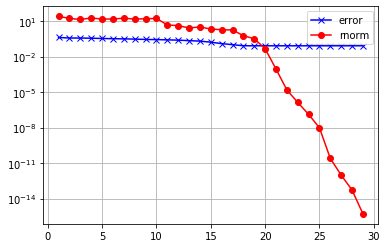

In [0]:
f_fcn = lambda x: 0*x
def utrue_fcn(x,ep):
    m = len(x)
    u = zeros(m)
    c = (2*ep)/(1+ep)
    half = int(floor(m/2))
    u[0:half] = c*x[0:half]/ep
    u[half:m] = (c/(2*ep))+c*(x[half:m]-0.5)
    return u


errors,rnorms, figs = solve_bvp_CG(f_fcn,utrue_fcn,.1,19,40,1)
semilogy(range(1,len(errors)+1), errors, 'b-x', label = 'error')
semilogy(range(1,len(errors)+1), rnorms, 'r-o', label = 'rnorm')
legend()
grid(True)

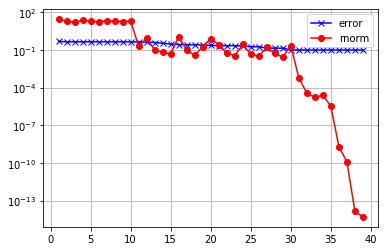

In [0]:
errors,rnorms, figs = solve_bvp_CG(f_fcn,utrue_fcn,.001,19,40,1)
semilogy(range(1,len(errors)+1), errors, 'b-x', label = 'error')
semilogy(range(1,len(errors)+1), rnorms, 'r-o', label = 'rnorm')
legend()
grid(True)

In [0]:
animate_figs(figs)

interactive(children=(IntSlider(value=0, description='frameno', max=37), Output()), _dom_classes=('widget-inte…

I have a bug in my code so that the calculated solutions are slightly off. For some reason it is pinning the second value in u to 0 as well as the boundary. But I think the convergent behavior is still similar, with $\epsilon = 10^{-3}$ needing more iterations to converge and both taking over the number of m. 

***
##Problem 4
###a)
$A = \begin{pmatrix} -2\epsilon & \epsilon & 0 \\ \epsilon & -(1+\epsilon) & 1 \\ 0 & 1 & -2 \end{pmatrix} $

When $\epsilon$ is small the condition number gets very large

###b)
$M = \begin{pmatrix} 2\epsilon & 0 & 0 \\ 0 & (1+\epsilon) & 0 \\ 0 & 0 & 2 \end{pmatrix} $

$M^{-1}A = \begin{pmatrix} -1 & \frac{1}{2} & 0 \\ \frac{\epsilon}{1+\epsilon} & -1 & \frac{1}{1+\epsilon} \\ 0 & \frac{1}{2} & -1 \end{pmatrix} $ 

$M^{-1}A$ is clearly not symmetric

###c)
$C^{-T} = C^{-1}$ since C is a diagonal matrix so $C^{-T}AC^{-1}$ is essentially multiplying every element by the corresponding diagonal element in C both row and element: 

$C^{-T}AC^{-1} = \begin{pmatrix} -1 & \frac{\epsilon}{\sqrt{2\epsilon}\sqrt{1+\epsilon}} & 0 \\ \frac{\epsilon}{\sqrt{2\epsilon}\sqrt{1+\epsilon}} & -1 & \frac{1}{\sqrt{1+\epsilon}\sqrt{2}} \\ 0 & \frac{1}{\sqrt{1+\epsilon}\sqrt{2}} & -1 \end{pmatrix} $ 

Which is symmetric

###d)





In [0]:
ep = 10e-4
A = [[-2*ep, ep, 0 ],
     [ep, -(1+ep) ,0],
     [0 ,1 , -2]]
egs, egvecs = eig(A)
egsiv, egvecs = eig(inv(A))
cnum = max(abs(egs))*max(abs(egsiv))
print(egs,cnum)

[-2.000000e+00 -1.001001e+00 -1.998999e-03] 1000.5007506246857


In [0]:
ep = 10e-4
M = [[2*ep, 0, 0 ],
     [0, (1+ep) ,0],
     [0 ,0 , 2]]
egs, egvecs = eig(inv(M)*A)
egsiv, egvecs = eig(inv(M)*A)
cnum = max(abs(egs))*max(abs(egsiv))
print(egs,cnum)

[-1. -1. -1.] 1.0


The condition number much improved with B

###e)
The limit matrix is:
$\begin{pmatrix} -1 & \frac{1}{2} & 0 \\ 0 & -1 & 1 \\ 0 & \frac{1}{2} & -1 \end{pmatrix} $ 
So the condition number approaches 1 (calculated below)

In [0]:

B = [[-1, 0.5, 0 ],
     [0, -1 ,1],
     [0 ,0.5 , -1]]
egs, egvecs = eig(inv(M)*A)
egsiv, egvecs = eig(inv(M)*A)
cnum = max(abs(egs))*max(abs(egsiv))
print(egs,cnum)

[-1. -1. -1.] 1.0
